# Fuzzy Logic



In [1]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

userInput = [[],[]]
notValid = "\tPlease enter on a scale of 0 to 10."
invalid = "\tPlease enter number only."


In [3]:
# Prompt user a few questions
print ("Q1. How do you rate the food?")
answer = -1

while 0 > answer: #or 10 < answer:
    try:
        answer = float(input("\tAnswer >>  "))
    except ValueError:
        print (invalid)
    if 0 > answer or 10 < answer:
        print (notValid)
userInput[0] = answer


Q1. How do you rate the food?
	Answer >>  2


In [4]:
### print ("How do you rate the service?")
answer = -1
while 0 > answer : #or 10 < answer:
    try:
        answer = float(input("\tAnswer >>  "))
    except ValueError:
        print (invalid)
    if 0 > answer or 10 < answer:
        print (notValid)
userInput[1] = answer

	Answer >>  1


In [5]:
# generate universe variables
#   *Quality and service on subjective ranges [0,10]
#   *Tip has a range of [0,25] in units of percentage points
x_qual = np.arange(0,11,1)
x_serv = np.arange(0,11,1)
x_tip = np.arange(0,26,1)

In [6]:
# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual,[0,0,5])
qual_me = fuzz.trimf(x_qual,[0,5,10])
qual_hi = fuzz.trimf(x_qual,[5,10,10])

serv_lo = fuzz.trimf(x_serv,[0,0,5])
serv_me = fuzz.trimf(x_serv,[0,5,10])
serv_hi = fuzz.trimf(x_serv,[5,10,10])

tip_lo = fuzz.trimf(x_tip,[0,0,13])
tip_me = fuzz.trimf(x_tip,[0,13,25])
tip_hi = fuzz.trimf(x_tip,[13,25,25])

## Visualize these universes and membership functions

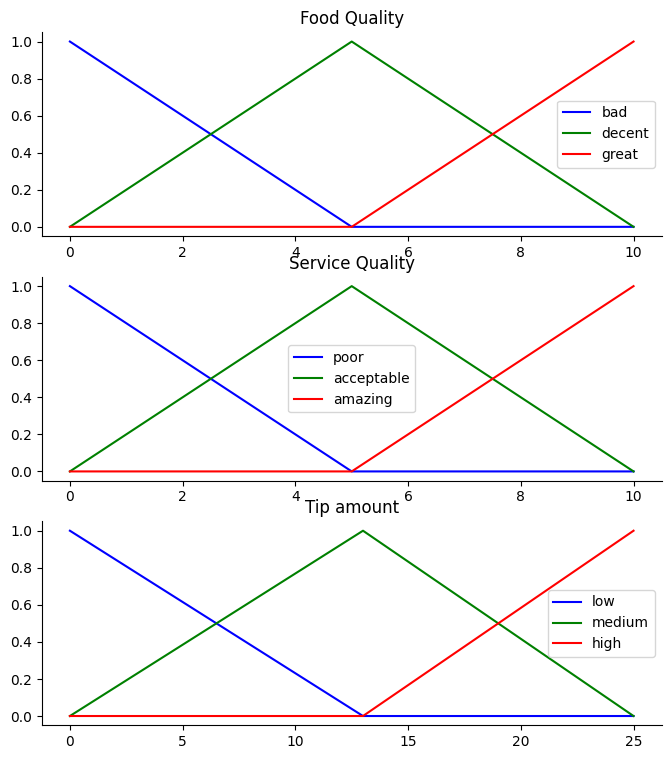

In [7]:

fig, (ax0,ax1,ax2) = plt.subplots(nrows=3,figsize=(8,9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='bad')
ax0.plot(x_qual, qual_me, 'g', linewidth=1.5, label='decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='great')
ax0.set_title('Food Quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='poor')
ax1.plot(x_serv, serv_me, 'g', linewidth=1.5, label='acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='amazing')
ax1.set_title('Service Quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='low')
ax2.plot(x_tip, tip_me, 'g', linewidth=1.5, label='medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='high')
ax2.set_title('Tip amount')
ax2.legend()

# # turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Fuzzy Rules

Fuzzy rules: Now, to make the triangles useful, we define the "fuzzy relationship" between input and output variables. For the purposes of our example, consider three simple rules:

    1) If the food is bad OR the service is poor, then the tip will be low

    2) If the service is acceptable, then the tip will be medium

    3) If the food is great OR the service is amazing, then the tip will be high

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels. The rules normally are suggested by experts.


![](https://i163.photobucket.com/albums/t281/kyin_album/FL1.png)

![](http://i163.photobucket.com/albums/t281/kyin_album/FL.png)

![](http://i163.photobucket.com/albums/t281/kyin_album/FL3.png)

In [8]:
# We need the activation of our fuzzy membership functions at these values.
# This is what fuzz.interp_membership exists for!
qual_level_lo  = fuzz.interp_membership(x_qual, qual_lo, userInput[0])
qual_level_me  = fuzz.interp_membership(x_qual, qual_me, userInput[0])
qual_level_hi  = fuzz.interp_membership(x_qual, qual_hi, userInput[0])

serv_level_lo  = fuzz.interp_membership(x_serv, serv_lo, userInput[1])
serv_level_me  = fuzz.interp_membership(x_serv, serv_me, userInput[1])
serv_level_hi  = fuzz.interp_membership(x_serv, serv_hi, userInput[1])

In [9]:
# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo = np.fmin(active_rule1, tip_lo) # membership function with 'np.fmin'

# For rule 2 we connect acceptable service to medium tipping
tip_activation_me = np.fmin(serv_level_me, tip_me)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3,tip_hi)
tip0 = np.zeros_like(x_tip)


Visualize the output membership function for the above rules

Text(0.5, 1.0, 'Output membership activity')

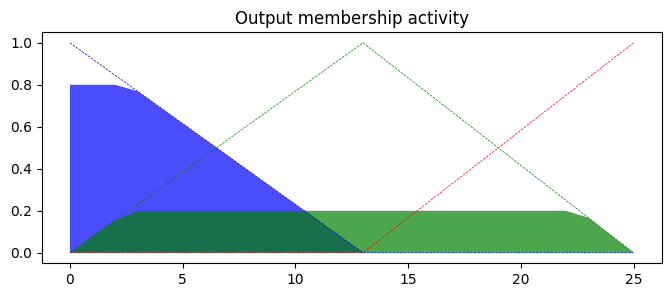

In [10]:
fig, ax0 = plt.subplots(figsize=(8,3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip,tip_lo, 'b', linewidth=0.5, linestyle='--')

ax0.fill_between(x_tip, tip0, tip_activation_me, facecolor='g', alpha=0.7)
ax0.plot(x_tip,tip_me, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip,tip_hi, 'r', linewidth=0.5, linestyle='--')

ax0.set_title('Output membership activity')



In [11]:
# Aggregrate all three output membership functions together
aggregrated = np.fmax(tip_activation_lo, np.fmax(tip_activation_me, tip_activation_hi))

#Calculate deffuzified results
tip = fuzz.defuzz(x_tip, aggregrated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregrated, tip) # for plot

Text(0.5, 1.0, 'Aggregrated membership and result (line)')

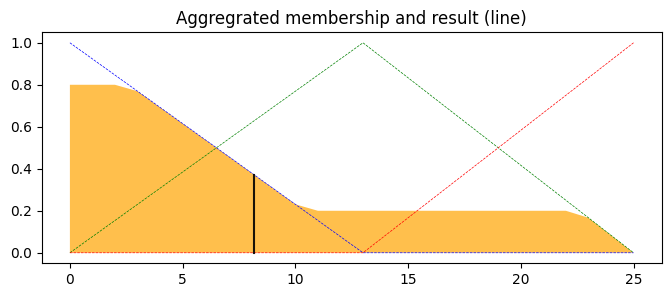

In [12]:
# visualize this
fig, ax0 = plt.subplots(figsize=(8,3))

ax0.plot(x_tip, tip_lo, 'b', linewidth = 0.5, linestyle='--')
ax0.plot(x_tip, tip_me, 'g', linewidth = 0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth = 0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregrated, facecolor='Orange', alpha=0.7) #alpha=transparentval
ax0.plot([tip,tip],[0,tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregrated membership and result (line)')




In [13]:
print("Tip =",tip)

if 8 > tip:
    print ("Tip is low")

elif 7 < tip:
    print ("Tip is good")

elif 14< tip:
    print ("Tip is excellent")

Tip = 8.177560397213576
Tip is good


## <font color='red'> Exercise</font>

1. Please use fuzzy logic to implement a smart air conditioning system. The system must be
able to determine the cooling temperature automatically based on the room temperature
and room density. The membership functions and the rules suggested by an expert are as
follows:

**Suggested membership functions:**
- M1: Temperature on subjective ranges [0, 50] (in degree Celcious)
- M2: Density on subjective ranges [0, 30] (representing how many person)
- M3: Cooling temperature has a range of [16, 30] (in degree Celcious)

* Each of them should be represented with Low, Medium, and High triangular membership
function. You may estimate the range of each level.


**Suggested rules in your fuzzy inference system:**
- **R1:** If the room temperature is low AND the density is low, then the cooling temperature
will be moderate.
- **R2:** If the room temperature is medium AND the density is high, then the cooling
temperature will be low
- **R3:** If the room temperature is high then the cooling temperature will be low.


**What would the cooling temperature be in the following circumstance?**
- room_temperature =16
- room_density = 25
- References:

### Reference:
Scikit-fuzzy documentation is available at http://pythonhosted.org/scikit-fuzzy/